In [15]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
df = pd.read_csv('TaxiData.csv')
df.head()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0


# Q 1.a

Checking data summary

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   15000 non-null  float64
 1   fare                    15002 non-null  float64
 2   trip_start_month        15002 non-null  int64  
 3   trip_start_hour         15002 non-null  int64  
 4   trip_start_day          15002 non-null  int64  
 5   trip_start_timestamp    15002 non-null  int64  
 6   pickup_latitude         15000 non-null  float64
 7   pickup_longitude        15000 non-null  float64
 8   dropoff_latitude        14520 non-null  float64
 9   dropoff_longitude       14520 non-null  float64
 10  trip_miles              15002 non-null  float64
 11  pickup_census_tract     1 non-null      float64
 12  dropoff_census_tract    10761 non-null  float64
 13  payment_type            15002 non-null  object 
 14  company                 9862 non-null 

In [19]:
# summary of df
df.describe()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,trip_seconds,dropoff_community_area,tips
count,15000.000000,15002.000000,15002.000000,15002.000000,15002.000000,1.500200e+04,15000.000000,15000.000000,14520.000000,14520.000000,15002.000000,1.000000e+00,1.076100e+04,14996.000000,14496.000000,15002.000000
mean,22.250267,11.768216,6.585655,13.632316,4.186642,1.408495e+09,41.903046,-87.657551,41.899786,-87.648077,2.872820,1.703108e+10,1.703135e+10,777.627501,20.966336,1.076674
std,19.414828,11.538850,3.390997,6.620927,2.015694,2.916043e+07,0.037751,0.067846,0.349865,0.729626,15.276007,NaN,3.312243e+05,977.538769,17.641307,2.158340
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.357000e+09,41.694879,-87.913625,0.000000,-87.913625,0.000000,1.703108e+10,1.703101e+10,0.000000,0.000000,0.000000
25%,8.000000,5.850000,4.000000,9.000000,2.000000,1.384622e+09,41.880994,-87.655998,41.880994,-87.656804,0.000000,1.703108e+10,1.703108e+10,360.000000,8.000000,0.000000
50%,8.000000,7.850000,7.000000,15.000000,4.000000,1.407260e+09,41.892508,-87.633308,41.893216,-87.634156,1.000000,1.703108e+10,1.703124e+10,540.000000,12.000000,0.000000
75%,32.000000,12.450000,10.000000,19.000000,6.000000,1.431339e+09,41.921877,-87.626211,41.922686,-87.626215,2.500000,1.703108e+10,1.703183e+10,960.000000,32.000000,2.000000
max,77.000000,700.070000,12.000000,23.000000,7.000000,1.483116e+09,42.009623,-87.572782,42.021224,0.000000,1710.000000,1.703108e+10,1.703198e+10,72120.000000,77.000000,47.000000


### 1. Categorize columns

#### Numerical Columns
- `fare`: This column represents the fare amount, a continuous numerical variable that can be analyzed directly (e.g., for averages, totals).
- `trip_start_hour`: Although it ranges from 0 to 23, this column represents the hour of the trip and is naturally numerical. Treating it as numerical allows calculations, like mean trip hours, if relevant.
- `trip_miles`: This column indicates the distance traveled in miles, a continuous numerical measurement suited for calculations such as averaging distances.
- `pickup_latitude`, `pickup_longitude`, `dropoff_latitude`, and `dropoff_longitude`: These columns represent geographic coordinates, which are inherently numerical. They’re suitable for operations like distance calculations between pickup and dropoff points.
- `trip_seconds`: Trip duration is best suited as a numerical column, as it allows for calculations of averages or total trip time.
- `tips`: This represents the tip amount in currency, a continuous numerical variable, so it fits into numerical analysis.

#### Categorical Columns
- `pickup_community_area` and `dropoff_community_area`: These columns represent predefined geographic zones. They don't have inherent numeric meaning, so we classify them as categorical.
- `trip_start_month` and `trip_start_day`: While represented as numbers, these actually denote categories of months and days. Treating them as categorical data makes it easier to encode and interpret as discrete categories.
- `payment_type`: Payment methods, such as "Credit Card" or "Cash," are categorical.
- `company`: The taxi company that provided the service is a categorical variable. It doesn't have inherent numeric meaning, so it's best treated as categorical.

#### Mixed Columns
- `trip_start_timestamp`: This column stores timestamps, which don't fit cleanly into categorical or numerical types without conversion. Converting it into datetime format allows for time-based analysis.
- `pickup_census_tract` and `dropoff_census_tract`: These columns represent census tracts, a geographic categorization. They're typically large integer codes that may include null values or non-numeric identifiers (like ZIP codes). Because these codes don’t imply numeric relationships, treating them as a complex type is useful unless they’re simplified.


### 2. Type Comversion and Identifying Missing Values

Converting datatype of time stamp to datetime datatype

In [20]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], unit='s')

#### Heatmap of missing values

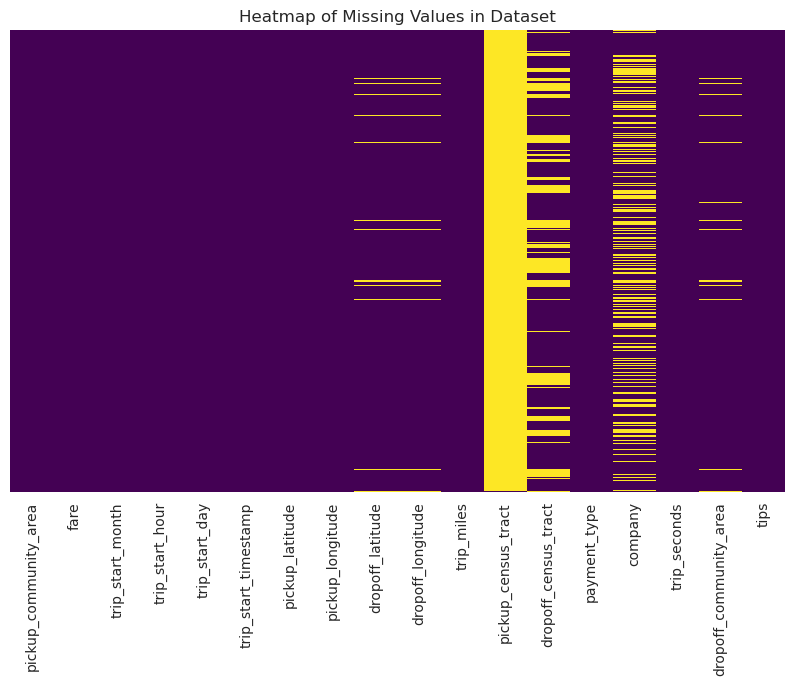

In [21]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values in Dataset")
plt.show()

The yellow lines show the positions of null values in a column

### Converting the datatype of categorical columns to categorical

In [22]:
categorical_columns = ['pickup_community_area', 'dropoff_community_area', 'payment_type', 'company', 'dropoff_census_tract']
for col in categorical_columns:
    df[col] = df[col].astype('category')


### 4. Handling Missing Values

To handle missing values in the dataset, we can use various strategies depending on the nature of the data and the specific column. Here are some common methods:

1. **Fill with a specific value**: For example, filling missing values with 0 or 'Unknown'.
2. **Fill with statistical measures**: Using mean, median, or mode of the column.
3. **Forward fill or backward fill**: Using the previous or next value in the column.

In our dataset, we have already applied some of these methods:

- For numerical columns like `fare`, `trip_seconds`, `pickup_latitude`, `pickup_longitude`, `dropoff_latitude`, and `dropoff_longitude`, we filled missing values with the mean or median.
- For categorical columns like `company`, we added a new category 'Unknown' and filled missing values with it.


In [23]:
df['fare'].fillna(df['fare'].mean(), inplace=True)
df['trip_seconds'].fillna(df['trip_seconds'].median(), inplace=True)
df['pickup_latitude'].fillna(df['pickup_latitude'].median(), inplace=True)
df['pickup_longitude'].fillna(df['pickup_longitude'].median(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].median(), inplace=True)
df['dropoff_longitude'].fillna(df['dropoff_longitude'].median(), inplace=True)


Removing the column ```pickup_census_tract``` because of data unavailiblity

In [24]:
df.drop(columns=['pickup_census_tract'], inplace=True)

#### Filling missing values in categorical columns as unknown

In [25]:
for col in categorical_columns:
    if 'Unknown' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(['Unknown'])
    df[col].fillna('Unknown', inplace=True)
    

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   pickup_community_area   15002 non-null  category      
 1   fare                    15002 non-null  float64       
 2   trip_start_month        15002 non-null  int64         
 3   trip_start_hour         15002 non-null  int64         
 4   trip_start_day          15002 non-null  int64         
 5   trip_start_timestamp    15002 non-null  datetime64[ns]
 6   pickup_latitude         15002 non-null  float64       
 7   pickup_longitude        15002 non-null  float64       
 8   dropoff_latitude        15002 non-null  float64       
 9   dropoff_longitude       15002 non-null  float64       
 10  trip_miles              15002 non-null  float64       
 11  dropoff_census_tract    15002 non-null  category      
 12  payment_type            15002 non-null  catego

In [27]:
df

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,Unknown,12.45,5,19,6,2014-05-16 19:45:00,41.892508,-87.633308,41.893216,-87.634156,0.0,Unknown,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,Unknown,0.0
1,Unknown,0.00,3,19,5,2013-03-07 19:15:00,41.892508,-87.633308,41.893216,-87.634156,0.0,Unknown,Unknown,Chicago Elite Cab Corp.,300.0,Unknown,0.0
2,60.0,27.05,10,2,3,2013-10-01 02:15:00,41.836150,-87.648788,41.893216,-87.634156,12.6,Unknown,Cash,Taxi Affiliation Services,1380.0,Unknown,0.0
3,10.0,5.85,10,1,2,2013-10-21 01:30:00,41.985015,-87.804532,41.893216,-87.634156,0.0,Unknown,Cash,Taxi Affiliation Services,180.0,Unknown,0.0
4,14.0,16.65,5,7,5,2013-05-30 07:00:00,41.968069,-87.721559,41.893216,-87.634156,0.0,Unknown,Cash,Dispatch Taxi Affiliation,1080.0,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,8.0,3.25,5,11,5,2015-05-14 11:15:00,41.904935,-87.649907,41.904935,-87.649907,0.0,17031842200.0,Cash,Taxi Affiliation Services,60.0,8.0,0.0
14998,8.0,3.25,11,16,4,2013-11-27 16:15:00,41.904935,-87.649907,41.904935,-87.649907,0.0,17031842200.0,Cash,Taxi Affiliation Services,0.0,8.0,0.0
14999,8.0,4.25,12,13,3,2015-12-08 13:00:00,41.904935,-87.649907,41.904935,-87.649907,0.3,17031842200.0,Cash,Unknown,180.0,8.0,0.0
15000,61.0,9.85,9,15,6,2014-09-12 15:00:00,41.809018,-87.659167,41.829922,-87.672503,3.0,Unknown,Cash,Taxi Affiliation Services,780.0,59.0,0.0


In [28]:
df.to_csv('TaxiDataCleaned.csv', index=False)